# Sphere collapse

<img src="sphere.gif" width="500" align="right">
<img src="sphere_particle.gif" width="500" align="right">
<br>
We hereby present a simulation of a selfsimilar collapsing homogeneous (isothermal) sphere.

## Initial Data
To better understand the choice of our initial datas, we first have to show the conversion we used to go from Internal Units to the cgs system.<br>
From the definition of *centripetal force*<br><br>
$$ f_\text{cp} = \dfrac{v^2}{r} = \dfrac{GM}{r^2}$$
<br>
we define the following *adimensional quantity* for our conversion
<br><br>
$$ \bigg(\dfrac{GM}{rv^2}\bigg)_\text{iu} = \bigg(\dfrac{GM}{rv^2}\bigg)_\text{cgs} $$
<br>
Since the quantity is derived from the centripetal force we decided to use the mass ratios and distance from the Earth-Sun system, interpreting $m_\text{iu} = 1 = 1\ M_\odot$. From which

$$
\dfrac{m_\text{cgs}}{m_\text{iu}} = 2 \times 10^{33} \qquad \dfrac{r_\text{cgs}}{r_\text{iu}} = 1.49 \times 10^{13}
$$

From which we find
$$
\dfrac{v_\text{cgs}}{v_\text{iu}} = 3 \times 10^6\
$$

### Intepreting the data

The initial data set that we have chosen to simulate a bound system is the following, expressed in internal units:

| Object | Mass      |   x   |   y   |   z   | vx       | vy       | vz       |
|--------|-----------|-------|-------|-------|----------|----------|----------|
|   1    |     1     |   0   |  0.5  |   0   |   -0.5   |     0    |    0.5    |
|   2    |     1     |   0   |  -0.5 |   0   |    0.5   |     0    |    0.5    |


Which in cgs units translates to:

| Object | Mass (g) | x (cm) | y (cm) | z (cm) | v_x (cm/s) | v_y (cm/s) | v_z (cm/s) |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | 2 x 10^33 | 0 | 7.4 x 10^12 | 0 | -1.5 x 10^6 | 0 | 1.5 x 10^6 |
| 2 | 2 x 10^33 | 0 | -7.4 x 10^12 | 0 | 1.5 x 10^6 | 0 | 1.5 x 10^6 |


We have set up the total time of the simulation to be of 10 IU and the ouput to be printed every 0.01 UI, to have enought data to be confronted with the theoretical model.
<br>

This represents a configuration of two masses that initially lie on the origin, opposite one to another on the y axis, with opposite velocities on the x axis, and with a net velocity on the z axis.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
%config InlineBackend.figure_format='retina'

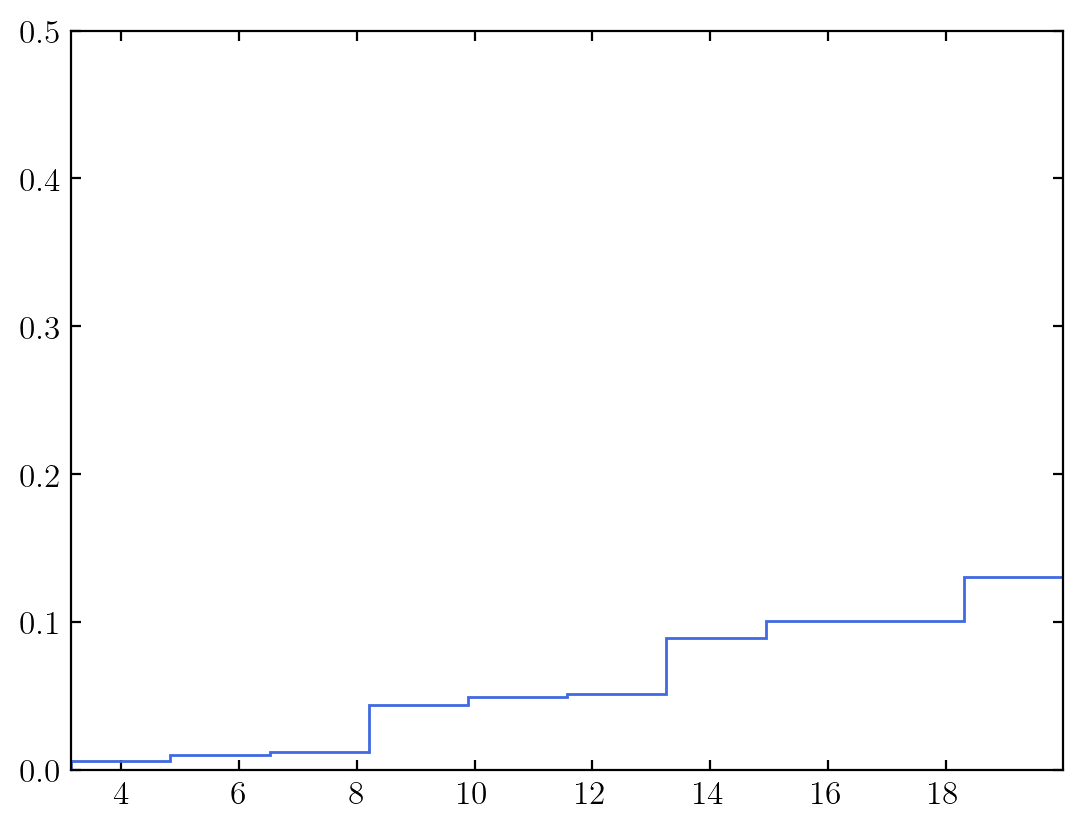

In [2]:
# generating initial points
N = int(3e2)

a = 20 #sphere radius

I = lambda x: a*x**(1/3)
P = np.random.uniform(0,1,N)

r = I(P)
theta = np.random.uniform(0, np.pi,N)
phi = np.random.uniform(0, 2*np.pi, N)

plt.hist(r, density = True, histtype = 'step', color='royalblue')
plt.ylim([0,.5]);

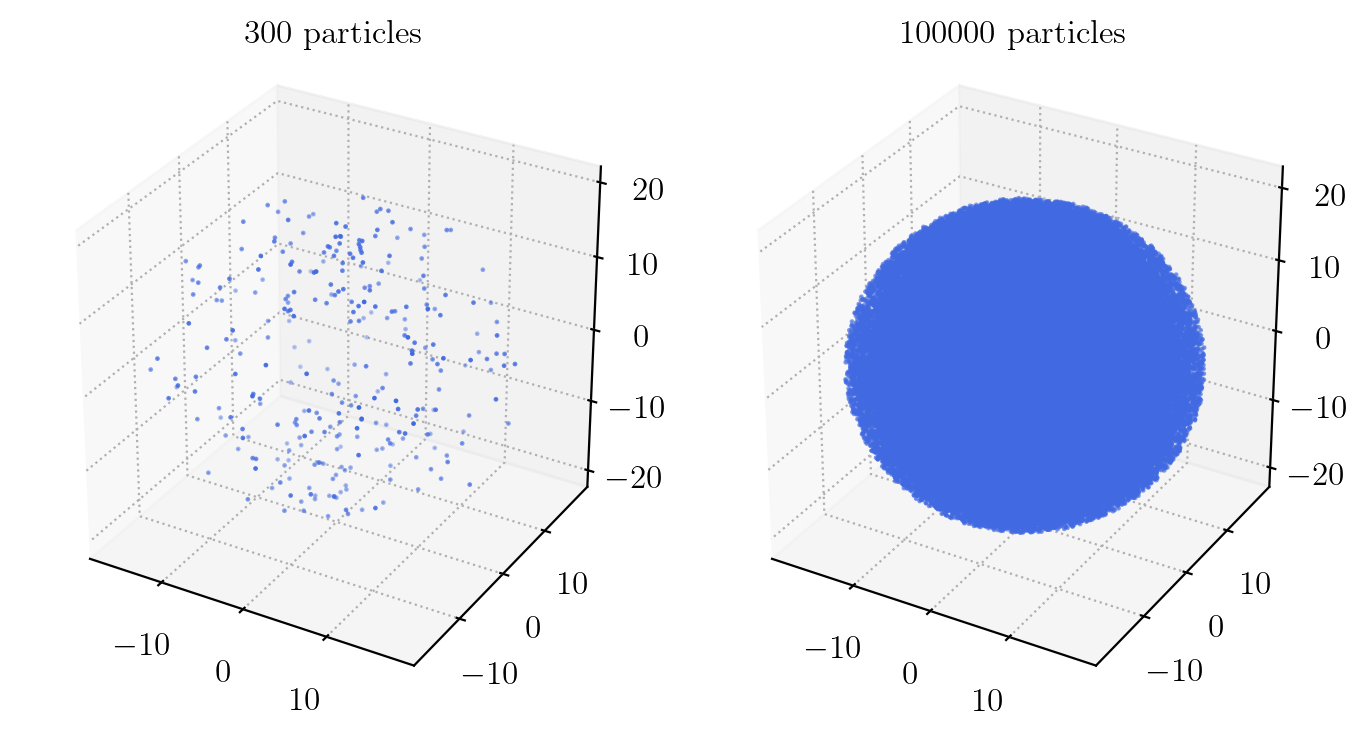

In [3]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

N_m = int(1e5)
P_m = np.random.uniform(0,1,N_m)

r_m = I(P_m)
theta_m = np.random.uniform(0,np.pi,N_m)
phi_m = np.random.uniform(0, 2*np.pi, N_m)


x_m = r_m*np.sin(theta_m)*np.cos(phi_m)
y_m = r_m*np.sin(theta_m)*np.sin(phi_m)
z_m = r_m*np.cos(theta_m)


fig, axs = plt.subplots(1,2, figsize = (7,7), tight_layout = True, subplot_kw={'projection': '3d'})
axs[0].set(aspect='equal', title = f'{N} particles')
axs[0].scatter(x,y,z, s = .5, color='royalblue')
axs[1].set(aspect='equal', title = f'{N_m} particles')
axs[1].scatter(x_m,y_m,z_m, s =.5, color='royalblue');

Density is compatible with a delta function for 56.57%.


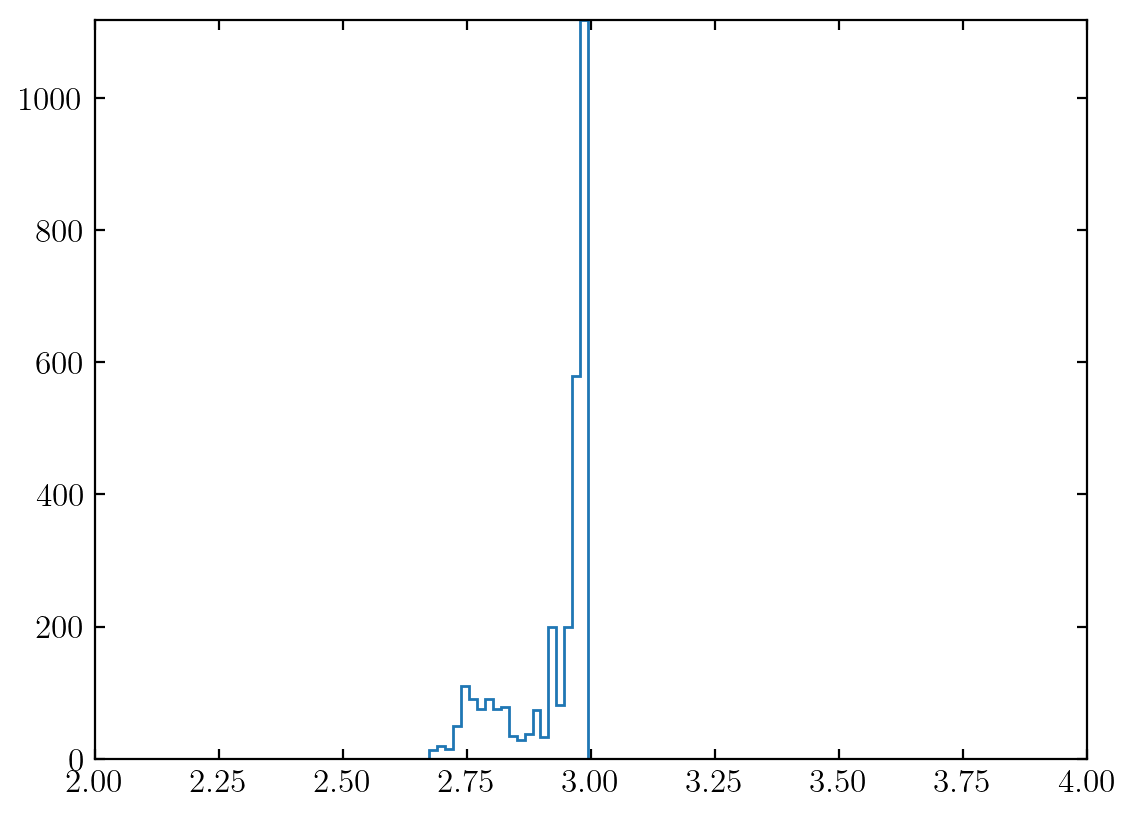

In [20]:
#Checking density
steps = 3000
scan = np.linspace(2, a, steps)
volume = 0
density = []

for i in scan:
    volume = (4/3) * np.pi * (i**3)
    mask = tuple([r_m <= i])
    new_r = r_m[mask]
    number = len(new_r)
    density.append(number/volume)

density = np.array(density)
counts, bins = np.histogram(density)
plt.hist(density, histtype = 'step', bins=20)
plt.xlim([2,4])
max = np.max(counts)
prob = max/steps
print('Density is compatible with a delta function for {:.2f}%.'.format(prob*100));

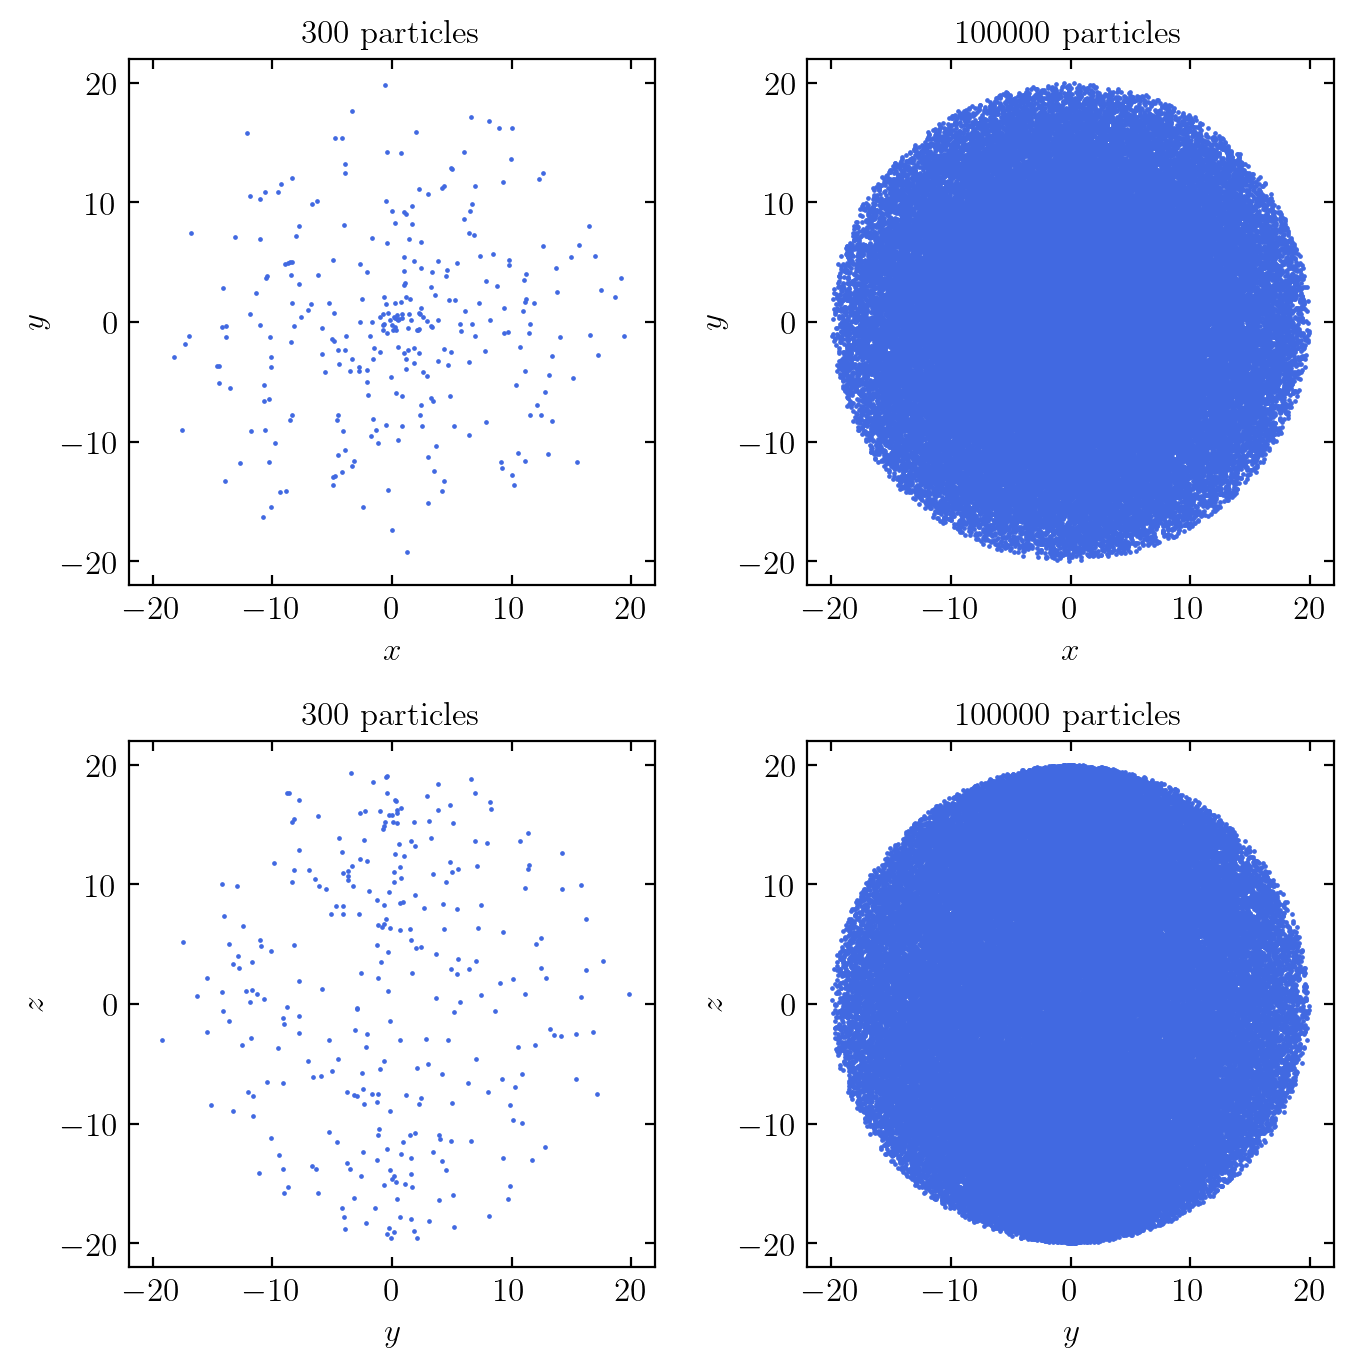

In [21]:
fig, axs = plt.subplots(2,2, figsize = (7,7), tight_layout = True)

for j in range(2):
    axs[0,j].set(xlabel = r'$x$', ylabel = r'$y$')
    axs[1,j].set(xlabel = r'$y$', ylabel = r'$z$')
    for i in range(2):
        axs[i,j].set(aspect='equal', xlim = [-22,22], ylim = [-22,22])
        axs[i,0].set(title = f'{N} particles')  
        axs[i,1].set(title = f'{N_m} particles')
    
axs[0,0].scatter(x,y, s = .5, color='royalblue')
axs[1,0].scatter(y,z, s = .5, color='royalblue')
axs[0,1].scatter(x_m,y_m, s = .5, color='royalblue')
axs[1,1].scatter(y_m,z_m, s = .5, color='royalblue');

In [22]:
# creating the input file
m = .5

with open ('in_data.txt', 'w+') as f:
    f.write(str(N) + '\n')
    f.write('0' + '\n')
    for i in range(N):
        f.write(f'{m} {x[i]} {y[i]} {z[i]} 0 0 0')
        f.write('\n')

---

## Data fetching and plots

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [24]:
# override IPython's default %%bash to not buffer all output
from IPython.core.magic import register_cell_magic
@register_cell_magic
def bash(line, cell): get_ipython().system(cell)

# this (non-default package) keeps the end of shell output in view
try: import scrolldown
except ModuleNotFoundError: pass

In [25]:
# only first time compiling
# %%bash
# ./nbody_sh1 -o 0.1 -t 50 < in_data.txt > out_data.txt

In [26]:
lines = pd.read_csv('out_data.txt').to_numpy()
N_particles = N

s = N_particles + 2 #step

t = lines[0::s].astype(float)
l = np.array([])
mxv = []

for i in tqdm(range(1, s-1)):
    l = np.append(l, lines[i::s])
    mxv = np.array([x.split(' ') for x in l.ravel()],dtype=float)

  0%|          | 0/300 [00:00<?, ?it/s]

In [27]:
properties = 7

mxv = mxv.reshape(N_particles, len(t), properties)

#print(a)
#print(N_particles)
print(t.shape)
print(mxv.shape)

print(f"\n3D array containing all the particles at all times",
      f"\n{np.size(mxv, 0)} is the particles array", 
      f"\n{np.size(mxv, 1)} is the iterations array", 
      f"\n{np.size(mxv, 2)} the property array of each particle")

(500, 1)
(300, 500, 7)

3D array containing all the particles at all times 
300 is the particles array 
500 is the iterations array 
7 the property array of each particle


In [28]:
m = mxv[:,0,0] #mass is conserved through time
x = mxv[:,:,1]
y = mxv[:,:,2]
z = mxv[:,:,3]
vx = mxv[:,:,4]
vy = mxv[:,:,5]
vz = mxv[:,:,6]

print(m.shape)
print(x.shape)

(300,)
(300, 500)


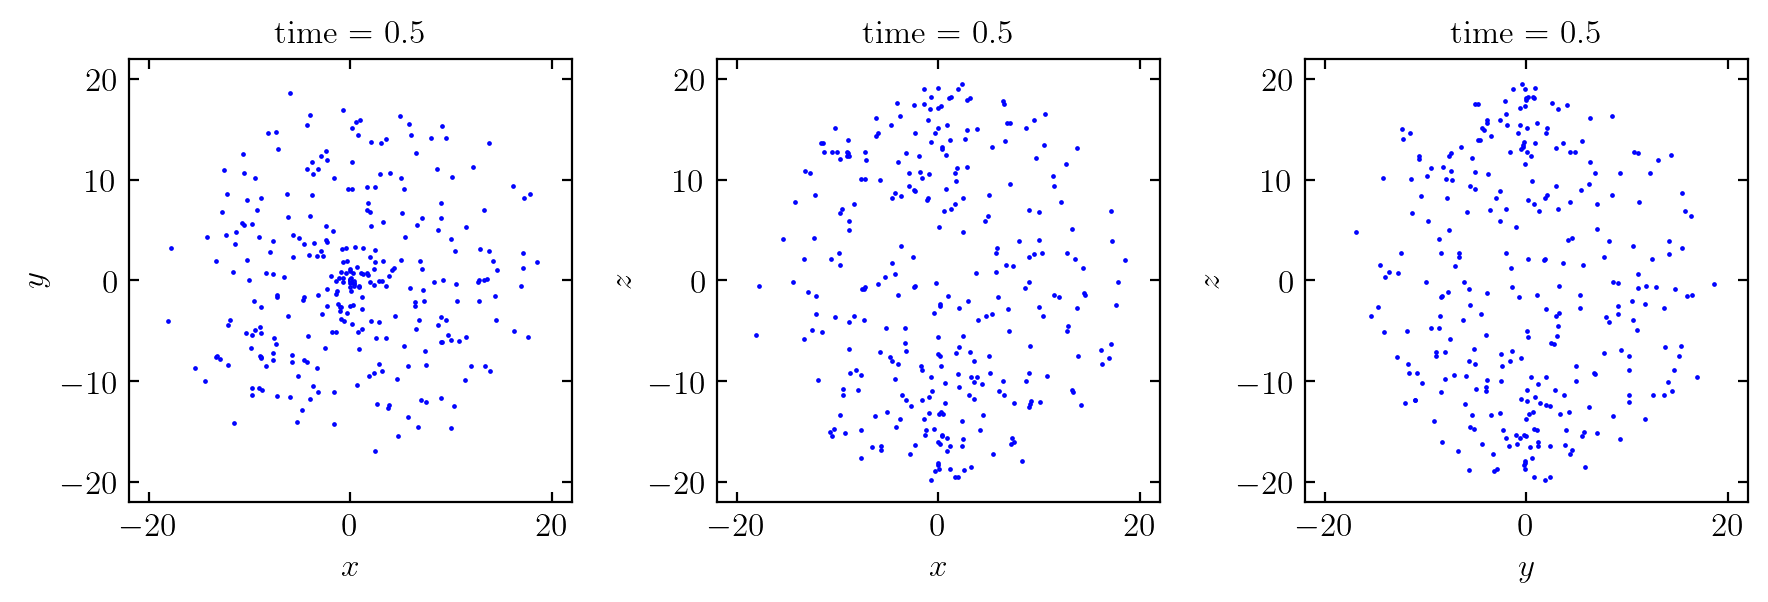

In [29]:
fig, axs = plt.subplots(1,3, figsize = (9,9), tight_layout = True)
t_i = 4

l = a+2

for i in range(3):
    axs[i].set(aspect='equal', xlim = [-l,l], ylim = [-l,l], title = f'time = {round(t[t_i, 0],2)}')

#don't get fooled by shape! the first entry are the particles not the time!
axs[0].scatter(x[:,t_i],y[:,t_i], s = .5)
axs[0].set(xlabel = r'$x$', ylabel = r'$y$')
axs[1].scatter(x[:,t_i],z[:,t_i], s = .5)
axs[1].set(xlabel = r'$x$', ylabel = r'$z$')
axs[2].scatter(y[:,t_i],z[:,t_i], s = .5)
axs[2].set(xlabel = r'$y$', ylabel = r'$z$');

---

# Analysis

### Free Fall and Dynamical time

8.111557351947225


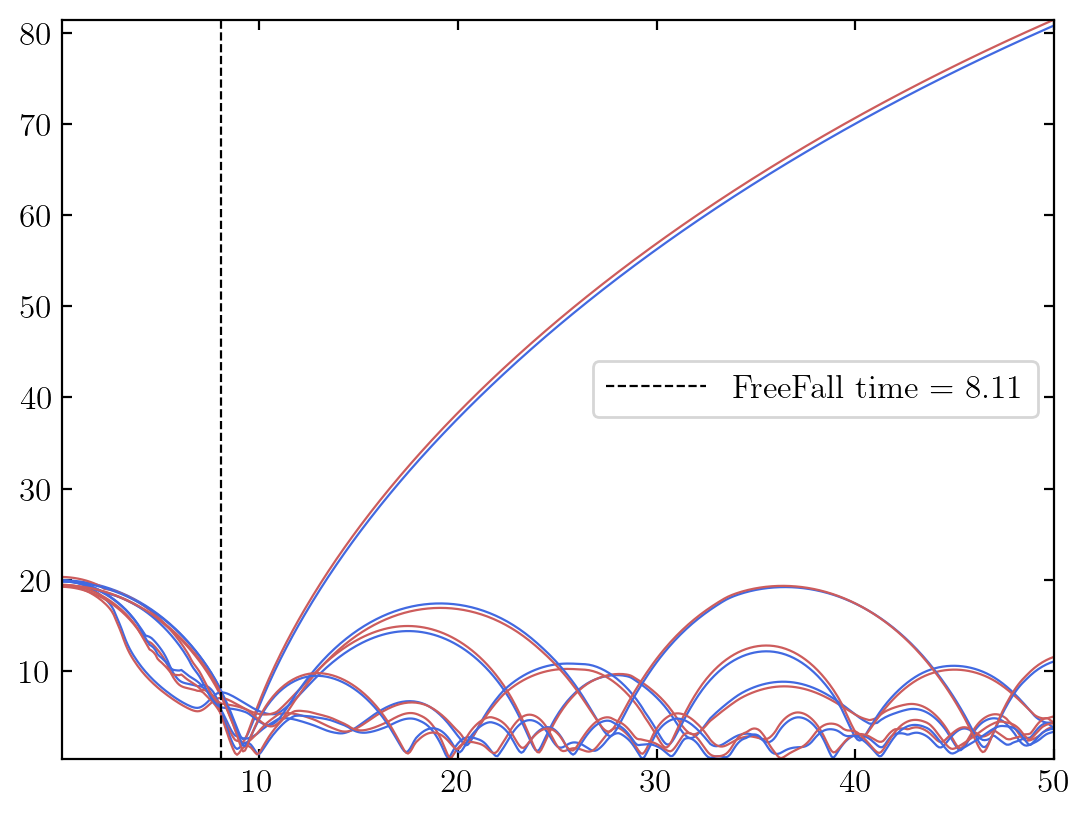

In [30]:
r = np.sqrt(x**2 + y**2 + z**2)
r_i = r[:,0]                                 #i take all points at time 0
mask = (r_i >= 19.8) & (r_i <= 20.2)         #i take only the external ones at time 0


x_cm = np.sum(x[:, 0]*m)/np.sum(m)
y_cm = np.sum(y[:, 0]*m)/np.sum(m)
z_cm = np.sum(z[:, 0]*m)/np.sum(m)

r_cm = np.sqrt((x - x_cm)**2 + (y - y_cm)**2 + (z -z_cm)**2)

r_ext_cm = r_cm[mask, :]                           #i take the external ones at all times 
r_ext = r[mask, :]                           #i take the external ones at all times 

#r[0,:] is the same particle at all times 
#r[:,0] is all particles at a specific time
num_points = len(r_i[mask])

for i in range(num_points):
    plt.plot(t, r_ext[i,:],  c='royalblue', lw = .8)        #Not corrected
    plt.plot(t, r_ext_cm[i,:],  c='indianred', lw = .8)     #Corrected for CM

rho = np.sum(m)/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))
print(t_ff)

plt.axvline(t_ff, color = 'black', ls = '--', lw = .8, label=f'FreeFall time = {round(t_ff, 2)}')
plt.legend()
plt.show()

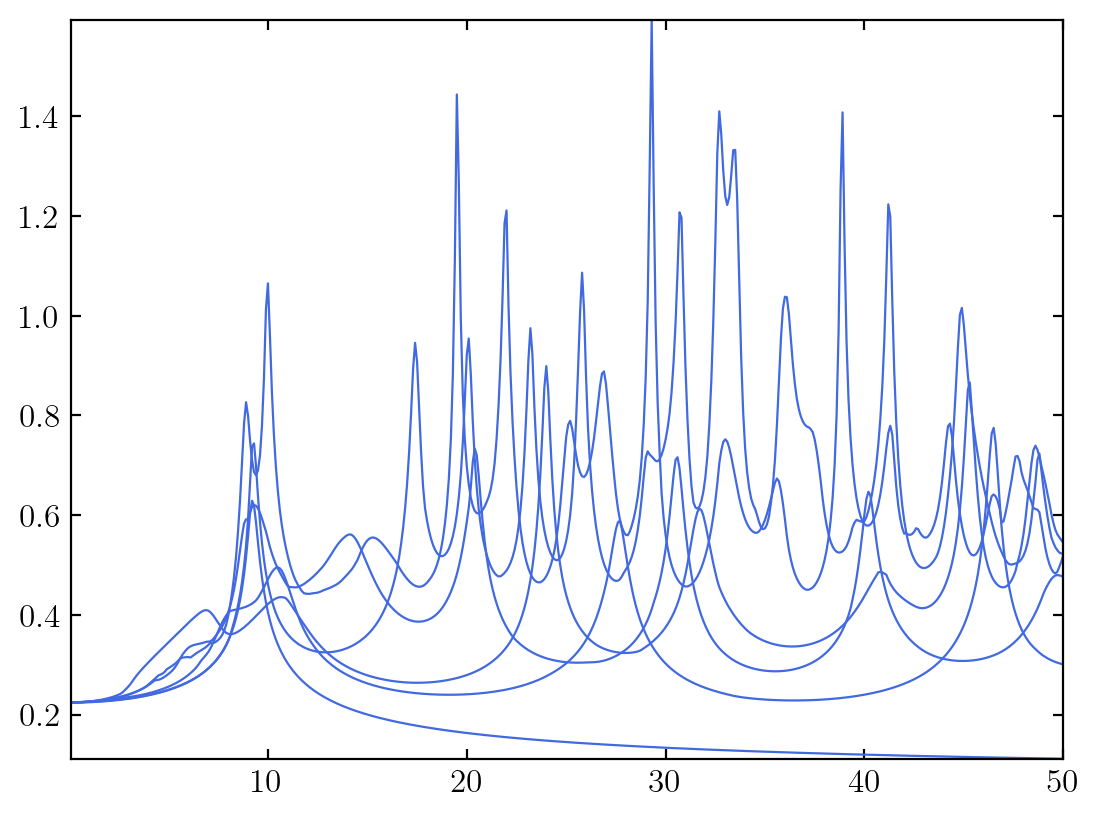

In [31]:
#escape velocity
v_ext = np.sqrt(2*G*m[0]/r_ext)

for i in range(len(v_ext)):
    plt.plot(t, v_ext[i,:], c='royalblue', lw = .8)

free fall time: 8.11
dynamical time: 11.47


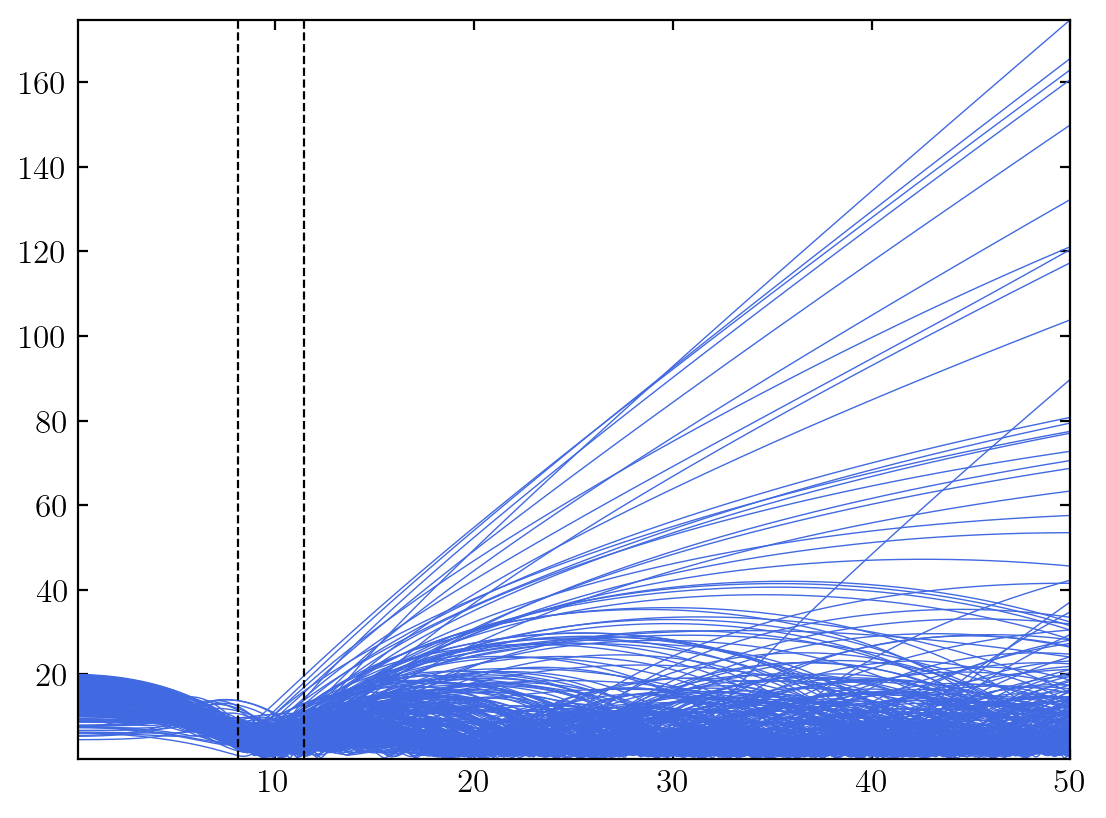

In [32]:
for i in range(len(r)):
    plt.plot(t,r[i,:], c='royalblue', lw = .5);
rho = np.sum(m)/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))
t_dyn = np.sqrt(3*np.pi/(16*G*rho))
print(f'free fall time: {round(t_ff,2)}')
print(f'dynamical time: {round(t_dyn,2)}')

plt.axvline(t_ff, color = 'black', ls = '--', lw = .8);
plt.axvline(t_dyn, color = 'black', ls = '--', lw = .8);

---

# Animation code

In [33]:
#calculating the position of the center of mass

  0%|          | 0/500 [00:00<?, ?it/s]

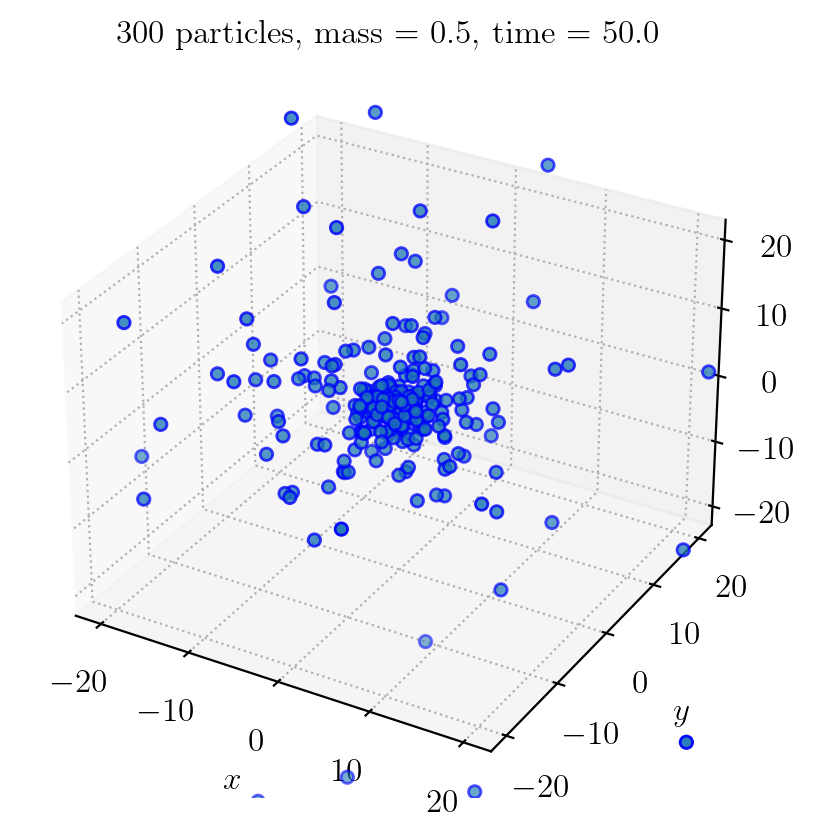

In [34]:
# simulation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    ax.clear()
    
    ax.scatter(x[:,num-1], y[:,num-1], z[:,num-1])        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m[0]}, time = {round(t[num, 0],2)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = r"sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

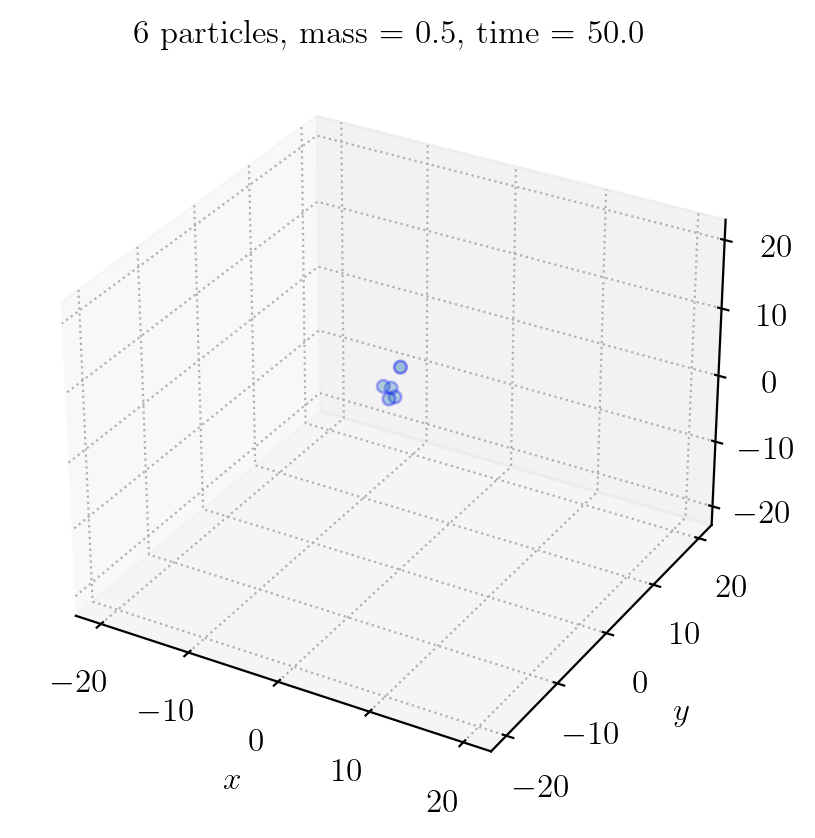

In [35]:
def update_single(num):    
    N = len(x[mask, 0])   #N_particles
    ax.clear()
    
    ax.scatter(x[mask,num-1], y[mask,num-1], z[mask,num-1])        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m[0]}, time = {round(t[num, 0],2)}')

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
  

# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update_single, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = r"sphere_particle.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()